In [1]:
pip install numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:

pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:

pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('train.csv')

In [12]:
news_dataset.shape


(20800, 5)

In [13]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


C:\Users\hp\AppData\Local\Temp\ipykernel_9208\1529447720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)


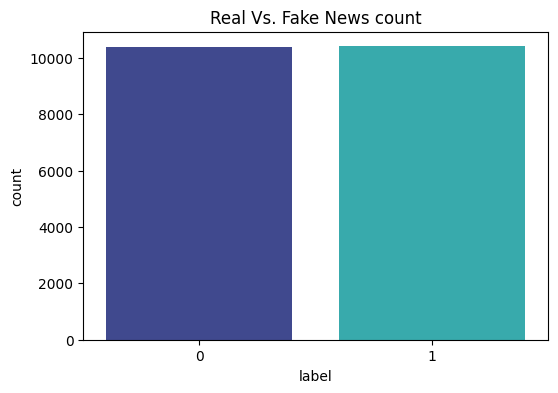

In [14]:
plt.figure(figsize = (6,4))
sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)
plt.title("Real Vs. Fake News count", fontsize = 12)
plt.show()

In [15]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()


id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [16]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')


In [17]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [18]:
# separating the data & label
news_dataset = news_dataset.sample(n=500)
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']
print(X)
print(Y)

          id                                              title  \
6635    6635  BREAKING: Oregon Standoff Leaders Acquitted Fo...   
5960    5960  Chinese Military Enters Afghanistan Fray with ...   
9275    9275  Silly Republicans, FBI didn’t ‘REOPEN’ Hillary...   
9497    9497  His Tone Dark, Donald Trump Takes G.O.P. Mantl...   
515      515  Bankrupt Puerto Rico Voting on U.S. Statehood ...   
...      ...                                                ...   
12605  12605  Is a ‘False Flag’ Alien Invasion in the Works?...   
4312    4312  Remembrance Project Members Give Their Take on...   
16159  16159  Dr. Duke & Farren Shoaf: We are the Republican...   
322      322     Sparks Fly as Bikers for Trump Meet Protesters   
19388  19388  Heureux et souriant, il a la chance de toujour...   

                                  author  \
6635            The Free Thought Project   
5960                          Edwin Mora   
9275                           J.E. Dyer   
9497   Patrick Heal

In [19]:
port_stem = PorterStemmer()


In [20]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content


In [21]:
news_dataset['content'] = news_dataset['content'].apply(stemming)
print(news_dataset['content'])

6635     free thought project break oregon standoff lea...
5960     edwin mora chines militari enter afghanistan f...
9275     j e dyer silli republican fbi reopen hillari i...
9497     patrick heali jonathan martin tone dark donald...
515      chriss w street bankrupt puerto rico vote u st...
                               ...                        
12605    arjun walia fals flag alien invas work wernher...
4312     ian mason remembr project member give take jef...
16159    dr patrick slatteri dr duke farren shoaf repub...
322                     spark fli biker trump meet protest
19388    heureux et souriant il la chanc de toujour ign...
Name: content, Length: 500, dtype: object


In [22]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values
print(X)

['free thought project break oregon standoff leader acquit malheur wildlif refug takeov'
 'edwin mora chines militari enter afghanistan fray pentagon knowledg'
 'j e dyer silli republican fbi reopen hillari investig sinc never offici close'
 'patrick heali jonathan martin tone dark donald trump take g p mantl new york time'
 'chriss w street bankrupt puerto rico vote u statehood breitbart' 'moron'
 'richard c paddock philippin leader shift drug war offici meet resist approv new york time'
 'michel moon donald trump london u help god bless breitbart'
 'steve eder sheri fink ami chozick soul search clinton foundat trump era new york time'
 'donald g mcneil jr new ebola vaccin give percent protect new york time'
 'new york time reflect rio new york time'
 'john oti maintain sunni spirit face hardship new york time'
 'awr hawkin ami schumer use netflix special go gun nut'
 'trent baker espn wilbon kaepernick blackbal question breitbart'
 'jonathan mahler steve eder vacanc black donald trum

In [23]:
print(Y)


[1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1
 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0
 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1
 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 1 1 1 

In [24]:
Y.shape


(500,)

In [25]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)
print(X)


  (np.int32(0), np.int32(13))	0.30835816438047214
  (np.int32(0), np.int32(265))	0.23228145010837795
  (np.int32(0), np.int32(854))	0.26504590756061647
  (np.int32(0), np.int32(1246))	0.2491411609356219
  (np.int32(0), np.int32(1326))	0.30835816438047214
  (np.int32(0), np.int32(1552))	0.2891921854144388
  (np.int32(0), np.int32(1706))	0.2755937069282336
  (np.int32(0), np.int32(1779))	0.30835816438047214
  (np.int32(0), np.int32(2065))	0.2891921854144388
  (np.int32(0), np.int32(2147))	0.30835816438047214
  (np.int32(0), np.int32(2186))	0.30835816438047214
  (np.int32(0), np.int32(2355))	0.30835816438047214
  (np.int32(1), np.int32(36))	0.32286853638528973
  (np.int32(1), np.int32(361))	0.3076865187950983
  (np.int32(1), np.int32(668))	0.34426638836488704
  (np.int32(1), np.int32(705))	0.32286853638528973
  (np.int32(1), np.int32(853))	0.34426638836488704
  (np.int32(1), np.int32(1212))	0.32286853638528973
  (np.int32(1), np.int32(1416))	0.34426638836488704
  (np.int32(1), np.int32(14

(500, 6)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)
#converting sparse matrix (csr_matrix) to array
X_train = X_train.toarray()
X_test = X_test.toarray()
print(X_train)
print(Y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1]


Decision Tree Without Python Package

In [40]:
import numpy as np

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, n_features, replace=False)

        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)

        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_left, n_right = len(left_idxs), len(right_idxs)
        e_left, e_right = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None
def evaluate_model(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    report = classification_report(Y_test, y_pred)
    return accuracy, report


# Train the Decision Tree model from scratch
dt = DecisionTree(max_depth=4)
dt.fit(X_train, Y_train)

# Evaluate the model's performance
accuracy, report = evaluate_model(dt, X_test, Y_test)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)



Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.92      0.98      0.95        47

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



Prediction on Testing data

In [47]:
print("actual output array:\n",Y_test)
prediction = dt.predict(X_test)
print("predicted output array :\n",prediction)



actual output array:
 [1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1]
predicted output array :
 [0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1]
